In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
xt = lambda t: np.cos(t) + (.5*np.random.randn(1) if np.random.randn(1) > .6 else 0)

In [22]:
tmin = 0
tmax = 60
dt = .1
t = np.arange(tmin, tmax, dt)
x = np.array([xt(ti) for ti in t])

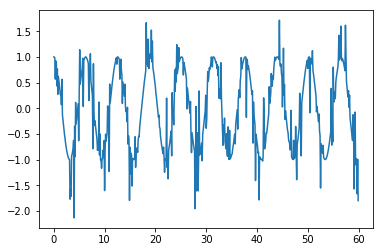

In [23]:
plt.plot(t, x)

# Mean and Variance

In [24]:
def avgnext(avgprev, xnext, tau):
    assert tau >= 1
    return (1-(1/tau))*avgprev + (1/tau)*xnext

def varnext(varprev, avgnext, xnext, tau):
    assert tau >= 1
    return (1-(1/tau))*varprev + (1/tau)*(xnext-avgnext)**2

In [25]:
def runningavg(x, tau):
    assert tau >= 1
    avg = np.empty_like(x)
    for i in range(len(x)):
        if i == 0:
            avg[i] = x[i]
        else:
            avg[i] = avgnext(avg[i-1], x[i], tau)
    return avg

def runningvar(x, tau):
    assert tau >= 1
    avg = runningavg(x, tau)
    var = np.empty_like(x)
    for i in range(len(x)):
        if i == 0:
            var[i] = (x[i] - avg[i])**2
        else:
            var[i] = varnext(var[i-1], avg[i], x[i], tau)
    return var

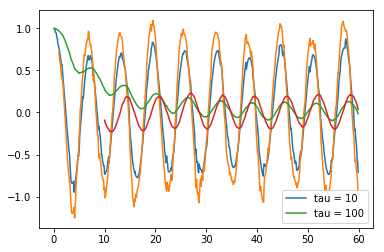

In [26]:
for tau in [10, 100]:
    plt.plot(t,runningavg(x, tau), label='tau = %s' %tau)
    plt.plot([t[i] for i in range(tau, len(x))], [np.mean(x[(t-tau+1):(t)]) for t in range(tau, len(x))])
plt.legend()

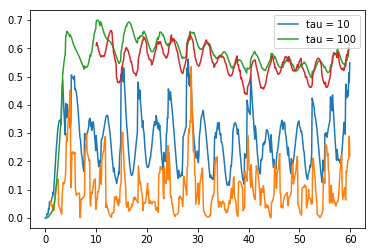

In [27]:
for tau in [10, 100]:
    plt.plot(t,runningvar(x, tau), label='tau = %s' %tau)
    plt.plot([t[i] for i in range(tau, len(x))], [np.var(x[(t-tau+1):(t)]) for t in range(tau, len(x))])
plt.legend()

# Covariance

In [28]:
x2 = np.array([xt(ti) for ti in t])

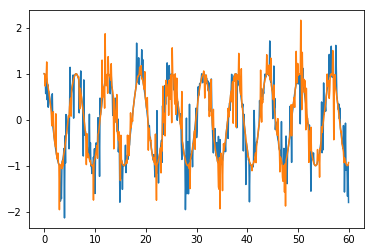

In [29]:
plt.plot(t, x)
plt.plot(t, x2)

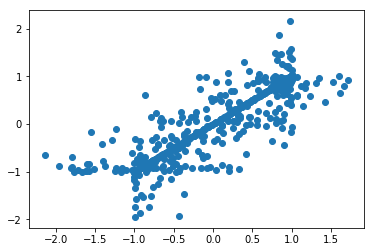

In [30]:
plt.scatter(x, x2)

In [31]:
def covnext(covprev, avgnext1, xnext1, avgnext2, xnext2, tau):
    assert tau >= 1
    return (1-(1/tau))*covprev + (1/tau)*(xnext1-avgnext1)*(xnext2-avgnext2)

In [32]:
def runningcov(x1, x2, tau):
    assert tau >= 1
    assert x1.shape == x2.shape
    avg1 = runningavg(x1, tau)
    avg2 = runningavg(x2, tau)
    cov = np.empty_like(x1)
    for i in range(len(x1)):
        if i == 0:
            cov[i] = (x1[i] - avg1[i])*(x2[i] - avg2[i])
        else:
            cov[i] = covnext(cov[i-1], avg1[i], x1[i], avg2[i], x2[i], tau)
    return cov

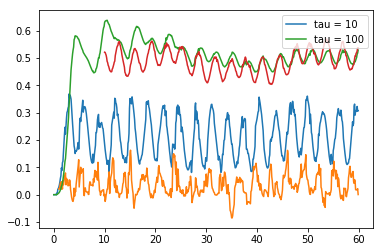

In [33]:
for tau in [10, 100]:
    plt.plot(t,runningcov(x, x2, tau), label='tau = %s' %tau)
    plt.plot([t[i] for i in range(tau, len(x))], [np.cov(x[(t-tau+1):(t)], x2[(t-tau+1):(t)])[0,1] for t in range(tau, len(x))])
plt.legend()